In [3]:
# import packages
import sympy as sy
import math
import time
import numpy as np
import pandas as pd 
# import plotting packages
import matplotlib.pyplot as plt
import plotly.express as px
from sympy.plotting import plot
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Covid-19 Layoffs - Analysis
## Melea Mendrin

## Table of Contents
 - [Introduction](#intro)
 - [Question 1](#quest1)
 - [Question 2](#quest2)
 - [Question 3](#quest3)


***

## Introduction  <a id='intro'> </a>

It is well known that the arrival of the Covid-19 pandemic has had a significant impact on global employment as well as on employment in the United States.  Covid-19 and stay-at-home lockdowns have caused changes in certain industries, where many people who did not work “essential jobs” were let go from their places of employment, resulting in large rates of layoffs over the past two years. Awareness of this situation has prompted me to question certain attributes of how layoff rates may have been influenced by the pandemic over time, and how such rates may be an indicator of changes in different industries.
In addition, I have seen numerous news headlines detailing Elon Musk’s acquisition of Twitter and the layoffs of Twitter employees that had been recently announced.  Seeing such news has led me to wonder how these layoffs from Twitter may have impacted layoff rates. To explore these potential influences on company layoffs, I have chosen to do the first project option and focus on the analysis of layoff data. Using a dataset from Kaggle.com (https://www.kaggle.com/datasets/swaptr/layoffs-2022?resource=download&select=layoffs.csv), I am going to analyze data from the layoffs of companies to derive insight from over the past two years.  This dataset includes layoff reports beginning in March 11th, 2020, when the World Health Organization first declared Covid-19 to be a pandemic, and continues to the present, although I will be using data only up to November 30th 2022. 


In [4]:
df = pd.read_csv(r'C:\Users\melea\Downloads\archive (3)\layoffs.csv')
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Lyst,London,Retail,50.0,0.25,2022-11-29,Unknown,United Kingdom,144.0
1,Bitfront,SF Bay Area,Crypto,NaN,1.00,2022-11-29,Unknown,United States,NaN
2,Lazerpay,Lagos,Crypto,NaN,NaN,2022-11-29,Unknown,Nigeria,NaN
3,MessageBird,Amsterdam,Other,NaN,0.31,2022-11-29,Series C,Netherlands,1100.0
4,Plerk,Guadalajara,Finance,NaN,0.40,2022-11-29,NaN,Mexico,NaN
...,...,...,...,...,...,...,...,...,...
1690,Service,Los Angeles,Travel,NaN,1.00,2020-03-16,Seed,United States,5.1
1691,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
1692,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
1693,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0


## Question 1) <a id='quest1'> </a>
Out of the finance, retail, and real estate industry, which had the largest number of employees laid off from March 2020 to November 2020, and which industry had the largest percentage of employees laid off?  

In [5]:
def question_1_finance():
    """ Uses a Lambda function that accepts a dataframe as an arguement,
    checks to see if the company is in a finance row under the 
    column titled industry, and the rows that include finance are returned
    and saved as FinanceDf. Then the average percentage of 
    employees laid off is calculated using mean() method. 
    After, the same process is aplied to the retail and real estate
    industries in subsequent functions. """
    #########################################################
    
    FinanceDf = df.loc[ lambda x : (x['industry'] == 'Finance').tolist() ]
    
    a = FinanceDf['percentage_laid_off'].dtypes
    if a != float:
        raise(TypeError('This column must have float values'))
        
    FinanceDf2 = FinanceDf["percentage_laid_off"].mean()  # finds average percentage of employees laid off
    FinanceDf3 = FinanceDf["total_laid_off"].sum()
print(FinanceDf2)  # prints average percentage laid off
print(FinanceDf3)  # prints total number laid off

0.2560958904109589
19600.0


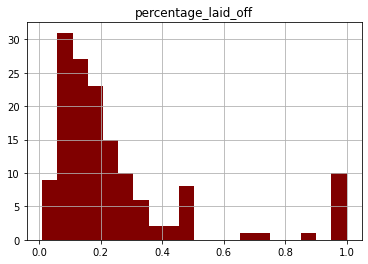

In [8]:
histogram1 = FinanceDf.hist(column='percentage_laid_off', bins=20, color='maroon')

In [6]:
def question_1_retail():
    """ Same purpose and process as previous function, only
    that this applies to the retail industry instead """
    ####################################################
    
    RetailDf = df.loc[ lambda x : (x['industry'] == 'Retail').tolist() ]
    
    b = RetailDf['percentage_laid_off'].dtypes
    if b != float:
        raise(TypeError('This column must have float values'))
        
    RetailDf2 = RetailDf["percentage_laid_off"].mean()
    RetailDf3 = RetailDf["total_laid_off"].sum()
print(RetailDf2)  # prints average percentage laid off
print(RetailDf3)  # prints total number laid off

0.30687500000000006
27287.0


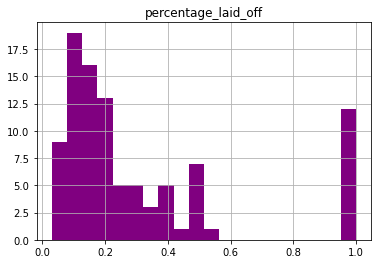

In [10]:
histogram2 = RetailDf.hist(column='percentage_laid_off', bins=20, color='purple')

In [144]:
def question_1_realestate():
    """ Same purpose and process as previous function, only
    that this applies to the real estate industry instead """
    ####################################################
    
    RealEstateDf = df.loc[ lambda x : (x['industry'] == 'Real Estate').tolist() ]
    
    c = RealEstateDf['percentage_laid_off'].dtypes               # raise type error 
    if c != float:                                               # column should be float values so we can use mean() 
        raise(TypeError('This column must have float values'))   # and get the most precise results
        
    RealEstateDf2= RealEstateDf["percentage_laid_off"].mean()
    RealEstateDf3 = RealEstateDf["total_laid_off"].sum()
print(RealEstateDf2)  # prints average percentage laid off
print(RealEstateDf3) # prints total number laid off

0.32257142857142845
16022.0


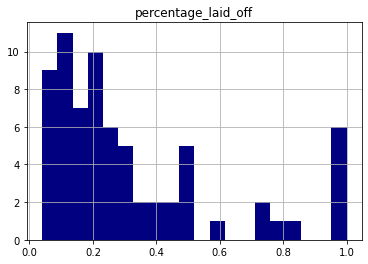

In [124]:
histogram3 = RealEstateDf.hist(column='percentage_laid_off', bins=20, color='navy')

Using these functions on the dataset, we get that the finance industry had 19,600 emloyees laid off, the retail industry had 27,287 employees laid off, and the real estate industry had 16,022 employees laid off.  From these three industries, it is apparent that the retail industry had the most employees laid off. 
<br/><br/>
From these functions, we also get that 25.6 percent of the finance industry was laid off, 30.6 percent of the retail industry was laid off, and 32.3 percent of the real estate industry was laid off.  In comparision to employee count, when comparing percentages, it is found that the real estate industry suffered the most from layoffs.

## Question 2) <a id='quest2'> </a>
Was there an increase in the average percentage of company layoffs after Elon Musk announced layoffs for Twitter on November 3rd, 2022, in comparison to the average percentage of all months prior in 2022? If so, by how much, and are these results significant?


In [102]:
# These functions finds the average percentage of company layoffs from Nov 3rd 2022
# to Nov 29th 2022, as noted by rows 0-161 in the dataframe, and finds the average percentage of company
# layoffs from March 11th 2020 to Nov 3rd 2022 as noted by rows 161-1019. 


df2 = df.iloc[0 : 161]  # create a subset dataframe from rows 0-161, representing all data entries that occur
                        # after Elon Musk declared Twitter layoffs
    
df3 = df.iloc[162 : 1019]  # subset dataframe from all entries in 2022 not included in previous dataframe df2


def question_2_part1():   # after Twitter layoffs
    
    """ This function finds the average percentage of employees laid off """
    
    for index in df2.index:                            
        #print(df2['percentage_laid_off'][index])
        df2['percentage_laid_off'].mean()
print(df2['percentage_laid_off'].mean()) 

###########################################
    
def question_2_part2():  # Before Twitter layoffs
    
    """ This function finds the average percentage of employees laid off """
    
    for index in df3.index:
        #print(df3['percentage_laid_off'][index])
        df3['percentage_laid_off'].mean()
print(df3['percentage_laid_off'].mean())

############################################

difference = df2['percentage_laid_off'].mean() - df3['percentage_laid_off'].mean()
print(difference)



0.26872881355932204
0.2470998278829603
0.021628985676361734


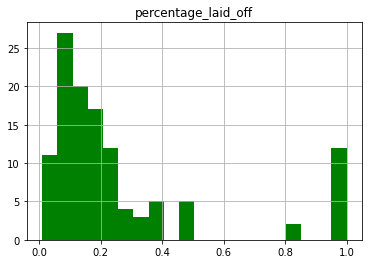

In [127]:
histogram4 = df2.hist(column='percentage_laid_off', bins=20, color='green') 
# percentage of company layoffs after Elon Musk announced layoffs for Twitter on November 3rd, 2022

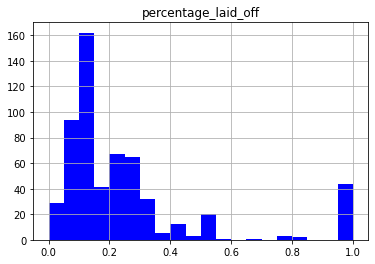

In [129]:
histogram5 = df3.hist(column='percentage_laid_off', bins=20, color='blue') 
# percentage of layoffs in 2022 before Twitter layoffs

Answering question 2, there was in fact an increase in layoffs after Elon Musk announced Twitter layoffs in November.  Prior to Twitter Layoffs, the average layoff rate for 2022 was 24.7 percent.  After the announcement of Twitter layoffs, however, the rate increased to 26.9 percent, which is approximately a 2.2 percent difference.  Although this is not a significantly large difference, this does indicate that Twitter layoffs may have affected layoff rates at a global scale.

In [78]:
# this is an alternate method to answering the same question, where a function is not used
# and "for-loops" are not used


    subsetDf1 = df.loc[ 0 : 161 ]   # layoffs after Elon Musk announced Twitter layoffs
    avg1= subsetDf1['percentage_laid_off'].mean()
  

    subsetDf2 = df.loc[162 : 1019]   # layoffs prior to Elon Musk announcing Twitter layoffs
    avg2= subsetDf2['percentage_laid_off'].mean()
    
    
print(avg1)
print(avg2)
print(avg1-avg2)
    

0.26872881355932204
0.2470998278829603
0.021628985676361734


## Question 3) <a id='quest3'> </a>
Was there a greater average percentage of layoffs in 2020 or 2022, and what insights might this difference in percentage reveal about the world in these two years?

In [131]:
Df1 = df.loc[ 1062 : 1694 ]    #create a subset of main dataframe that only includes rows from 2020
#display(Df1)
avg1= Df1['percentage_laid_off'].mean()  # calculate average percentage of emplyees laid off from 2020
print(avg1)


Df2 = df.loc[ 0 : 1018 ]  #create a subset of main dataframe that only includes rows from 2022
#display(Df2)
avg2= Df2['percentage_laid_off'].mean()  # calculate average percentage of emplyees laid off from 2022
print(avg2)

0.309480906921241
0.2507510729613734


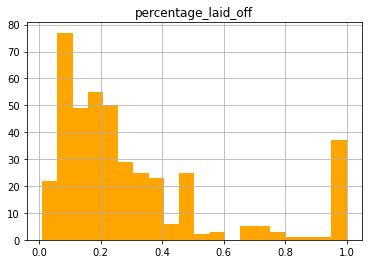

In [133]:
histogram6 = Df1.hist(column='percentage_laid_off', bins=20, color='orange')  # histogram for 2020

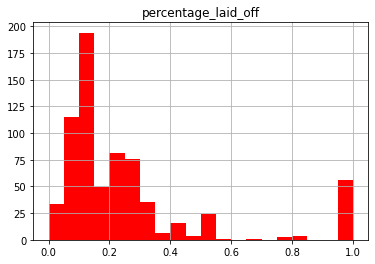

In [134]:
histogram7 = Df2.hist(column='percentage_laid_off', bins=20, color='red') # histogram for 2022

We find that the percentage of company layoffs was 30.9 percent in 2020 and 25.1 percent in 2022, indicating that there were more layoffs in 2020 at the start of the Covid-19 pandemic, as compared to this year.